---
---

<h1><center><ins>Exercise Sheet 5</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos

## Exercise 1 - Numerical derivative

**(A)** Compute the derivative of the following two functions:

$$ f_1(x) = x^2 + \cos(x) $$

$$ f_2(x) = \exp(x) - x^3 $$

in correspondence of at least $N = 50$ values $x_i$ ($i = 1, ..., N$) of the variable $x$ in the interval $[1,5]$. To do this, *write your own code to compute the derivatives numerically*.

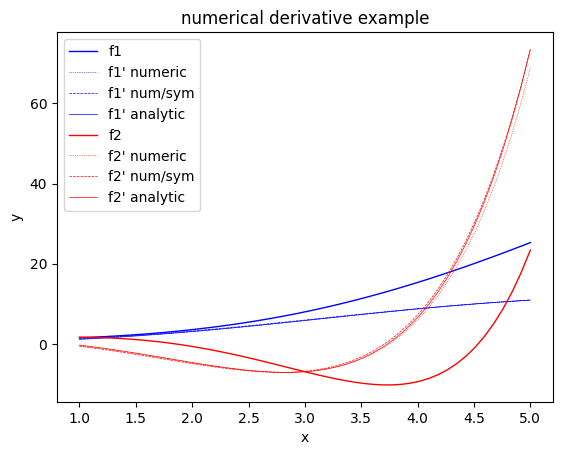

In [137]:
# (A) & part of (B)

from numpy import sin

int= [ 1.0, 5.0 ]
N= 50


# test function 1
def f1( x ):
  return x * x + cos( x )

# derivative of test function 1
def f1d( x ):
  return 2 * x - sin( x )

# test function 2
def f2( x ):
  return exp( x ) - x**3

# derivative of test function 2
def f2d( x ):
  return exp( x ) - 3 * x * x


def derivative1( f, interval, num=100 ):
  a= interval[0]                          # interval start
  b= interval[1]                          # interval end
  h= ( b - a ) / num                      # slice width
  fX= []                                  # array for function values
  for i in range( num+1 ):                # from a to b+h
    fX.append( f( a + h * i ) )           # f(x)
  df= []                                  # array for f'
  for i in range( num ):                  # from a to b
    df.append( ( fX[i+1] - fX[i] ) / h )  # f'(x)≈(f(x+h)-f(x))/h
  return df

def derivative2( f, interval, num=100 ):
  a= interval[0]                                        # interval start
  b= interval[1]                                        # interval end
  h= ( b - a ) / num                                    # slice width
  fX= []                                                # array for function values
  for i in range( num+2 ):                              # from a-h to b+h
    fX.append( f( a + h * i ) )                         # f(x)
  df= []                                                # array for f'
  for i in range( num ):                                # from a to b
    df.append( ( fX[i+1+1] - fX[i-1+1] ) / ( 2 * h ) )  # f'(x)≈(f(x+h)-f(x-h))/2h
  return df


X= np.linspace( int[0], int[1], num=N )   # N values from a to b
Y1= f1( X )                               # f1
Y2= f2( X )                               # f2
YD11= derivative1( f1, int, num=N )       # f1'
YD12= derivative1( f2, int, num=N )       # f2'
YD21= derivative2( f1, int, num=N )       # f1' symmetrical method
YD22= derivative2( f2, int, num=N )       # f2' symmetrical method
YD1= f1d( X )                             # f1' analytically
YD2= f2d( X )                             # f2' analytically

plt.figure()
plt.plot( X, Y1,   label='f1',           linewidth=1,   color='blue' )
plt.plot( X, YD11, label="f1' numeric",  linewidth=0.5, color='blue', linestyle='dotted' )
plt.plot( X, YD21, label="f1' num/sym",  linewidth=0.5, color='blue', linestyle='dashed' )
plt.plot( X, YD1,  label="f1' analytic", linewidth=0.5, color='blue' )
plt.plot( X, Y2,   label='f2',           linewidth=1,   color='red' )
plt.plot( X, YD12, label="f2' numeric",  linewidth=0.5, color='red',  linestyle='dotted' )
plt.plot( X, YD22, label="f2' num/sym",  linewidth=0.5, color='red',  linestyle='dashed' )
plt.plot( X, YD2,  label="f2' analytic", linewidth=0.5, color='red' )
plt.title( 'numerical derivative example' )
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.legend()
plt.show()


#EOF

**(B)** Compare the resulting values you get for the numerical derivatives with the corresponding analytic solutions. Calculate the value of the quantity $q$ for each function:

$$ q = \sum_{i=1}^N \frac{\left[d_i - f'(x_i) \right]}{f'(x_i)} $$

where $d_i$ are the values you obtained for the numerical derivatives for each of the $N$ abscissas, and $f'(x_i)$ are the analytical derivatives evaluated in points $x_i$. How does the value of $q$ change when changing the value of $h$ to compute the derivatives numerically? How do the values of $q$ compare for the two functions? Discuss your findings.

In [138]:
# (B)

a= int[0]
b= int[1]

for N in [ 10, 50, 100, 500 ]:
  h= ( b - a ) / N
  print( f'\nN={N}' )

  print( "Method 1: f'(x)≈(f(x+h)-f(x))/h" )

  D= derivative1( f1, int, num=N )
  q= 0
  for i in range( N ):
    d= f1d( a + h * i )
    if d != 0:
      q+= ( D[i] - d ) / d
  print( f'f1: q= {q}' )

  D= derivative1( f2, int, num=N )
  q= 0
  for i in range( N ):
    d= f2d( a + h * i )
    if d != 0:
      q+= ( D[i] - d ) / d
  print( f'f2: q= {q}' )

  print( "Method 2: f'(x)≈(f(x+h)-f(x-h))/2h" )

  D= derivative2( f1, int, num=N )
  q= 0
  for i in range( N ):
    d= f1d( a + h * i )
    if d != 0:
      q+= ( D[i] - d ) / d
  print( f'f1: q= {q}' )

  D= derivative2( f2, int, num=N )
  q= 0
  for i in range( N ):
    d= f2d( a + h * i )
    if d != 0:
      q+= ( D[i] - d ) / d
  print( f'f2: q= {q}' )


#EOF


N=10
Method 1: f'(x)≈(f(x+h)-f(x))/h
f1: q= 1.2827304245872546
f2: q= 8.065221484516961
Method 2: f'(x)≈(f(x+h)-f(x-h))/2h
f1: q= 2.6457091147645877
f2: q= 18.472734133850235

N=50
Method 1: f'(x)≈(f(x+h)-f(x))/h
f1: q= 1.1529381824590088
f2: q= 0.12685606044175599
Method 2: f'(x)≈(f(x+h)-f(x-h))/2h
f1: q= 2.319950551430592
f2: q= 0.03290475819232752

N=100
Method 1: f'(x)≈(f(x+h)-f(x))/h
f1: q= 1.1380753399221137
f2: q= 1.9349551972276218
Method 2: f'(x)≈(f(x+h)-f(x-h))/2h
f1: q= 2.2830660746177607
f2: q= 3.856425678580541

N=500
Method 1: f'(x)≈(f(x+h)-f(x))/h
f1: q= 1.1263933640291899
f2: q= 3.5172742419259997
Method 2: f'(x)≈(f(x+h)-f(x-h))/2h
f1: q= 2.2541504831149353
f2: q= 7.048302556919266


## Exercise 2 - Newton-Cotes formulas

In the file ```surface_luminosity.txt``` you will find the numerical function describing the surface luminosity $\Sigma$ of a globular star cluster as a function of the distance $R$ from its centre (projected on the plane of the sky). Compute the total luminosity $L$ of the system by performing the integral

$$ L = \int_0^{R_{\text{max}}} \Sigma(R) \, 2 \pi R \, dR $$

using the trapezoid rule and Simpson's rule, and compare the results you obtain. To do this, first choose one of these methods and implement **your own algorithm to compute the integral with it**; for the other method, use the corresponding built-in python function ```scipy.integrate.trapz``` or ```scipy.integrate.simps``` and familiarize on its usage.

In [139]:
from scipy import integrate
import math

def myTrapezoid( y, x ):
  xy= sorted( zip( x, y ) )     # sort tuples by x
  x, y= zip( *xy )              # overwrite x and y
  integral= 0
  for i in range( len( x ) - 1 ):
    integral+= ( (x[i+1] - x[i]) * (y[i] + y[i+1]) ) / 2  # Δx · ( leftY + rightY ) / 2
  return integral

def mySimpson( y, x ):
  xy= sorted( zip( x, y ) )     # sort tuples by x
  x, y= zip( *xy )              # overwrite x and y
  integral= 0
  for i in range( 1, len( x ) - 2 ):
    integral+= ( ( x[i+1] - x[i-1] ) / 12 ) * ( y[i-1] + 4*y[i] + y[i+1] )
  return integral


lum= np.genfromtxt( 'surface_luminosity.txt', dtype=float )
R= lum[:,0]  # R
S= lum[:,1]  # Σ(R)

I= []
for i in range( len( R ) ):
  I.append( S[i] * 2 * math.pi * R[i] )  # compute integrand: Σ(R)·2π·R

luminosity=  myTrapezoid( I, R )
print( f'total luminosity with my trapezoid:    {luminosity}' )

luminosity= integrate.trapezoid( I, R )
print( f'total luminosity with scipy trapezoid: {luminosity}' )

luminosity= mySimpson( I, R )
print( f'total luminosity with my simpson:      {luminosity}' )

luminosity= integrate.simpson( I, R )
print( f'total luminosity with scipy simpson:   {luminosity}' )

#EOF

total luminosity with my trapezoid:    1285408.7095045173
total luminosity with scipy trapezoid: 1285408.7095045173
total luminosity with my simpson:      1287285.897904224
total luminosity with scipy simpson:   1282549.6319938095


## Exercise 3 - Gaussian Quadrature

**(A)** Compute the following integral by using a 4-point Gaussian quadrature. 

$$ I = \int_{-1}^{1} \cos(x) dx $$

To do this, use the Legendre polynomial of degree 4:

$$ P_4(x) = \frac{1}{8}(35 x^4 - 30 x^2 +3) $$

At this link: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature you can find the roots of Legendre polynomials and the necessary weights to solve the integral (i.e., you do not have to calculate them all from scratch!).

**(B)** Compare the result with the ones you obtain when using a Legendre polynomial of degree 3, 2, and 1, and comment your findings.

## Exercise 4 - Monte Carlo integration 

Consider the following integral:
$$ I = \int_0^1 \cos \left(\frac{\pi x}{2} \right) dx = \frac{2}{\pi} $$

**(A)** Compute the above integral and its variance by using the following Monte Carlo methods:

1. mean value

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.

Monte Carlo Mean:
N=     10: ∫=0.7765567923, Δ=0.1399370199, σ=0.0195823695
N=    100: ∫=0.6271982276, Δ=0.0094215448, σ=0.0000887655
N=   1000: ∫=0.6362560962, Δ=0.0003636762, σ=0.0000001323
N=  10000: ∫=0.6383441775, Δ=0.0017244051, σ=0.0000029736
N= 100000: ∫=0.6352364456, Δ=0.0013833267, σ=0.0000019136
N=1000000: ∫=0.6372289487, Δ=0.0006091763, σ=0.0000003711
analytical ∫=0.6366197724


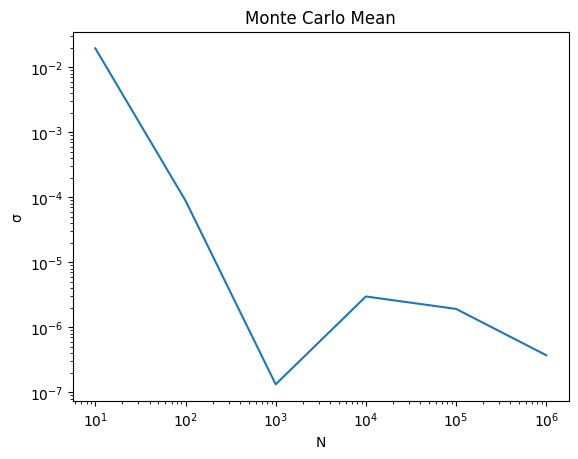

In [140]:
import math

interval= [ 0.0, 1.0 ]
nValues= [ 10, 100, 1000, 10000, 100000, 1000000 ]
exact= 2 / math.pi

def integrand( x ):
  return cos( ( math.pi * x ) / 2 )

print( 'Monte Carlo Mean:' )

sigma= []
for N in nValues:
  xR= np.random.uniform( interval[0], interval[1], N )  # N random x values
  yM= np.mean( integrand( xR ) )                        # mean of y values
  I= ( interval[1] - interval[0] ) * yM                 # ...times interval length
  d= abs( exact - I )                                   # difference
  s= d**2                                               # variance
  print( f'N={N:7d}: ∫={I:.10f}, Δ={d:.10f}, σ={s:.10f}' )
  sigma.append( s )

print( f'analytical ∫={exact:.10f}' )

plt.figure()
plt.plot( nValues, sigma )
plt.title( 'Monte Carlo Mean' )
plt.xlabel( 'N' )
plt.ylabel( 'σ' )
plt.loglog()
plt.show()

#EOF

## Exercise 5 - Monte Carlo integration continued (optional)

**(A)** Compute the above integral from Exercise 4 and its variance by using the other Monte Carlo methods covered in the lecture:

2. importance sampling
3. control variates
4. antithetic variates

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.

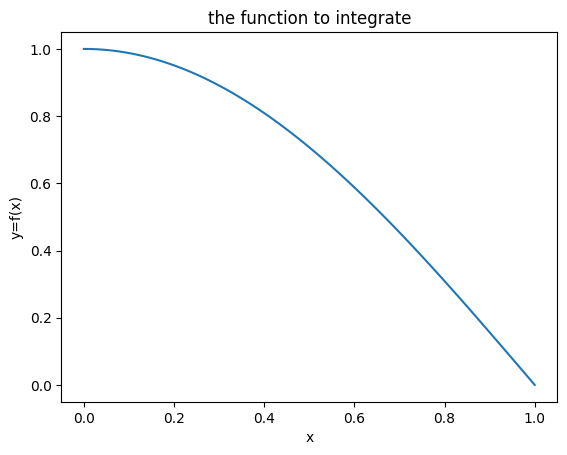

In [141]:
X= np.linspace( interval[0], interval[1], num=100 )   # 100 x values from a to b
Y= integrand( X )

plt.figure()
plt.plot( X, Y )
plt.title( 'the function to integrate' )
plt.xlabel( 'x' )
plt.ylabel( 'y=f(x)' )
plt.show()

#EOF